# Preprocessing data

Tahap pertama penyetinggan API, Libraries, Dataset

In [1]:
# Block 1: Install Kaggle API dan Download Dataset
!pip install -q kaggle  # Install Kaggle API

from sklearn.model_selection import train_test_split

from google.colab import files
files.upload()  # Unggah file kaggle.json dari komputer Anda

# Pindahkan file kaggle.json ke direktori yang benar
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verifikasi Kaggle API
!kaggle datasets list

# Download dataset dengan nama yang benar
!kaggle datasets download -d allandclive/chicken-disease-1 --force

# Unzip dataset ke dalam folder /content/dataset
!unzip -o chicken-disease-1.zip -d /content/dataset

# List file di dalam folder /content/dataset
!ls /content/dataset

# Jika Terjadi Error
!kaggle datasets download -d zynicide/wine-reviews

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Train/healthy.1872.jpg  
  inflating: /content/dataset/Train/healthy.1873.jpg  
  inflating: /content/dataset/Train/healthy.1874.jpg  
  inflating: /content/dataset/Train/healthy.1875.jpg  
  inflating: /content/dataset/Train/healthy.1876.jpg  
  inflating: /content/dataset/Train/healthy.1877.jpg  
  inflating: /content/dataset/Train/healthy.1878.jpg  
  inflating: /content/dataset/Train/healthy.1879.jpg  
  inflating: /content/dataset/Train/healthy.188.jpg  
  inflating: /content/dataset/Train/healthy.1880.jpg  
  inflating: /content/dataset/Train/healthy.1881.jpg  
  inflating: /content/dataset/Train/healthy.1882.jpg  
  inflating: /content/dataset/Train/healthy.1883.jpg  
  inflating: /content/dataset/Train/healthy.1884.jpg  
  inflating: /content/dataset/Train/healthy.1885.jpg  
  inflating: /content/dataset/Train/healthy.1886.jpg  
  inflating: /content/dataset/Train/healthy.1887.jpg  
  inflating: /c

melihat isi folder

In [2]:
# Block 2: List file dari folder Train
!ls /content/dataset/Train/


cocci.0.jpg	cocci.560.jpg	  healthy.2012.jpg  pcrcocci.3.jpg	salmo.159.jpg
cocci.1000.jpg	cocci.561.jpg	  healthy.2013.jpg  pcrcocci.40.jpg	salmo.15.jpg
cocci.1001.jpg	cocci.562.jpg	  healthy.2014.jpg  pcrcocci.41.jpg	salmo.1600.jpg
cocci.1002.jpg	cocci.563.jpg	  healthy.2015.jpg  pcrcocci.42.jpg	salmo.1601.jpg
cocci.1003.jpg	cocci.564.jpg	  healthy.2016.jpg  pcrcocci.43.jpg	salmo.1602.jpg
cocci.1004.jpg	cocci.565.jpg	  healthy.2017.jpg  pcrcocci.44.jpg	salmo.1603.jpg
cocci.1005.jpg	cocci.566.jpg	  healthy.2018.jpg  pcrcocci.45.jpg	salmo.1604.jpg
cocci.1006.jpg	cocci.567.jpg	  healthy.2019.jpg  pcrcocci.46.jpg	salmo.1605.jpg
cocci.1007.jpg	cocci.568.jpg	  healthy.201.jpg   pcrcocci.47.jpg	salmo.1606.jpg
cocci.1008.jpg	cocci.569.jpg	  healthy.2020.jpg  pcrcocci.48.jpg	salmo.1607.jpg
cocci.1009.jpg	cocci.56.jpg	  healthy.2021.jpg  pcrcocci.49.jpg	salmo.1608.jpg
cocci.100.jpg	cocci.570.jpg	  healthy.2022.jpg  pcrcocci.4.jpg	salmo.1609.jpg
cocci.1010.jpg	cocci.571.jpg	  healthy.2023.jpg  p

install TensorFlow

In [13]:
# Block 4: Install TensorFlow versi stabil
!pip install tensorflow==2.11.0 protobuf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 27.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: keras
    Found existing installation: kera

In [14]:
import tensorflow as tf
print(tf.__version__)  # Memeriksa versi TensorFlow yang diinstal


2.11.0


pengecekan folder label kelas

In [7]:
# Cek apakah folder Train ada
if os.path.exists(train_dir):
    print(f"Folder {train_dir} ditemukan")
    print("Berikut adalah isi folder Train:")
    print(os.listdir(train_dir))  # List isi folder Train
else:
    print(f"Folder {train_dir} tidak ditemukan")


Folder /content/dataset/Train ditemukan
Berikut adalah isi folder Train:
['ncd.76.jpg', 'salmo.1413.jpg', 'cocci.2035.jpg', 'pcrsalmo.295.jpg', 'salmo.814.jpg', 'healthy.1473.jpg', 'cocci.1731.jpg', 'healthy.1029.jpg', 'cocci.1233.jpg', 'pcrhealthy.118.jpg', 'healthy.44.jpg', 'salmo.1471.jpg', 'pcrsalmo.91.jpg', 'healthy.893.jpg', 'salmo.1857.jpg', 'pcrncd.38.jpg', 'cocci.1332.jpg', 'cocci.215.jpg', 'salmo.1366.jpg', 'ncd.194.jpg', 'cocci.1127.jpg', 'salmo.2175.jpg', 'salmo.686.jpg', 'pcrhealthy.71.jpg', 'healthy.305.jpg', 'healthy.1171.jpg', 'healthy.56.jpg', 'cocci.111.jpg', 'pcrncd.44.jpg', 'cocci.51.jpg', 'ncd.266.jpg', 'salmo.1717.jpg', 'healthy.1838.jpg', 'salmo.1153.jpg', 'ncd.55.jpg', 'cocci.1411.jpg', 'healthy.269.jpg', 'healthy.947.jpg', 'healthy.1443.jpg', 'pcrhealthy.320.jpg', 'pcrhealthy.297.jpg', 'ncd.63.jpg', 'cocci.476.jpg', 'salmo.862.jpg', 'pcrcocci.56.jpg', 'healthy.481.jpg', 'healthy.1582.jpg', 'healthy.1602.jpg', 'ncd.77.jpg', 'pcrsalmo.330.jpg', 'healthy.1104.jpg'

karena tidak ada folder label kelas jadi kita buat baru

In [8]:
import os
import shutil

# Direktori dataset
train_dir = '/content/dataset/Train'

# Nama kelas berdasarkan pola nama file
class_names = {
    'cocci': 'Coccidiosis',
    'healthy': 'Healthy',
    'ncd': 'New Castle Disease',
    'salmo': 'Salmonella'
}

# Buat folder untuk setiap kelas
for class_name in class_names.values():
    class_folder = os.path.join(train_dir, class_name)
    os.makedirs(class_folder, exist_ok=True)
    print(f"Folder {class_name} dibuat")


Folder Coccidiosis dibuat
Folder Healthy dibuat
Folder New Castle Disease dibuat
Folder Salmonella dibuat


pindahkan file data sesuai label kelas

In [9]:
# Pindahkan gambar ke folder yang sesuai
for img_file in os.listdir(train_dir):
    img_path = os.path.join(train_dir, img_file)
    if os.path.isfile(img_path):  # Cek apakah itu file
        for prefix, class_name in class_names.items():
            if img_file.startswith(prefix):  # Cek apakah nama file cocok dengan kelas
                class_folder = os.path.join(train_dir, class_name)
                shutil.move(img_path, class_folder)
                print(f"{img_file} dipindahkan ke folder {class_name}")
                break


Streaming output truncated to the last 5000 lines.
cocci.1766.jpg dipindahkan ke folder Coccidiosis
cocci.366.jpg dipindahkan ke folder Coccidiosis
salmo.424.jpg dipindahkan ke folder Salmonella
salmo.578.jpg dipindahkan ke folder Salmonella
healthy.227.jpg dipindahkan ke folder Healthy
cocci.1991.jpg dipindahkan ke folder Coccidiosis
cocci.1421.jpg dipindahkan ke folder Coccidiosis
healthy.439.jpg dipindahkan ke folder Healthy
cocci.1382.jpg dipindahkan ke folder Coccidiosis
healthy.1603.jpg dipindahkan ke folder Healthy
cocci.368.jpg dipindahkan ke folder Coccidiosis
salmo.386.jpg dipindahkan ke folder Salmonella
healthy.2043.jpg dipindahkan ke folder Healthy
cocci.1583.jpg dipindahkan ke folder Coccidiosis
salmo.665.jpg dipindahkan ke folder Salmonella
cocci.407.jpg dipindahkan ke folder Coccidiosis
salmo.942.jpg dipindahkan ke folder Salmonella
salmo.2088.jpg dipindahkan ke folder Salmonella
salmo.1728.jpg dipindahkan ke folder Salmonella
salmo.1370.jpg dipindahkan ke folder Salmon

cek hasil struktur folder kelas beserta jumlah gambarnya

In [10]:
import os

# Direktori dataset
train_dir = '/content/dataset/Train'

# Cek kelas di dalam folder Train
classes = os.listdir(train_dir)

# Menampilkan jumlah gambar di setiap kelas
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        print(f"Kelas {class_name}: {len(images)} gambar")


Kelas Coccidiosis: 2103 gambar
Kelas New Castle Disease: 376 gambar
Kelas Healthy: 2057 gambar
Kelas Salmonella: 2276 gambar


Pemisahan data untuk train dan validation

In [11]:
# Block 3: Split Dataset ke Train dan Validation
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the main dataset directory
dataset_dir = '/content/dataset/Train'  # Sesuaikan dengan folder dataset yang diunzip

# Define directories for training and validation sets
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'

# Buat folder train dan val jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop untuk setiap kelas di dalam dataset (misal 'normal', 'disease')
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)

    if os.path.isdir(class_path):  # Pastikan ini adalah folder kelas
        images = os.listdir(class_path)  # List semua gambar di folder kelas
        images = [f for f in images if os.path.isfile(os.path.join(class_path, f))]  # Hanya file

        # Bagi data menjadi train dan validation (80:20 split)
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Buat folder kelas di dalam train dan val
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Pindahkan gambar untuk training
        for img in train_images:
            shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

        # Pindahkan gambar untuk validation
        for img in val_images:
            shutil.move(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))


cek hasilnya

In [12]:
# Cek jumlah gambar di setiap folder train dan val setelah dipindahkan
for class_name in os.listdir(train_dir):
    train_class_path = os.path.join(train_dir, class_name)
    val_class_path = os.path.join(val_dir, class_name)

    train_images = os.listdir(train_class_path)
    val_images = os.listdir(val_class_path)

    print(f"Kelas {class_name}:")
    print(f"  - {len(train_images)} gambar di folder train")
    print(f"  - {len(val_images)} gambar di folder val")


Kelas Coccidiosis:
  - 1682 gambar di folder train
  - 421 gambar di folder val
Kelas New Castle Disease:
  - 300 gambar di folder train
  - 76 gambar di folder val
Kelas Healthy:
  - 1645 gambar di folder train
  - 412 gambar di folder val
Kelas Salmonella:
  - 1820 gambar di folder train
  - 456 gambar di folder val


In [19]:
# Membaca file CSV
csv_path = '/content/dataset/train_data.csv'
df = pd.read_csv(csv_path)
# Menampilkan beberapa baris pertama
df.head()


,images,label
0,salmo.1558.jpg,Salmonella
1,cocci.1866.jpg,Coccidiosis
2,cocci.171.jpg,Coccidiosis
3,salmo.1484.jpg,Salmonella
4,ncd.100.jpg,New Castle Disease


cek dan data cleaning

In [20]:
# Memeriksa data missing
print("Data Missing:")
print(df.isnull().sum())  # Menampilkan jumlah nilai yang hilang per kolom

# Memeriksa apakah ada duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah duplikat: {duplicates}")

# Menghapus duplikat jika ada
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplikat telah dihapus.")

# Menghapus baris dengan nilai yang hilang (jika ada)
df = df.dropna()  # Hapus baris dengan nilai yang hilang

# Menampilkan informasi DataFrame setelah cleaning
print("\nInformasi DataFrame setelah cleaning:")
print(df.info())


Data Missing:
images    0
label     0
dtype: int64

Jumlah duplikat: 0

Informasi DataFrame setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8067 entries, 0 to 8066
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  8067 non-null   object
 1   label   8067 non-null   object
dtypes: object(2)
memory usage: 126.2+ KB
None


Tahap augmentasi data

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generator untuk augmentasi pada training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Hanya rescaling untuk validation (tidak ada augmentasi)
val_datagen = ImageDataGenerator(rescale=1./255)

# Path ke direktori train dan validation
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'

# Load dan augment data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Ukuran gambar sesuai yang diharapkan model CNN
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Load data validasi (tanpa augmentasi)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 5447 images belonging to 4 classes.
Found 1365 images belonging to 4 classes.


Setelah tahap ini, langkah selanjutnya adalah membangun dan melatih model

##Tahap Visualisasi data

Visualisasi Distribusi Data

<ipython-input-23-64d674a0ffcc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


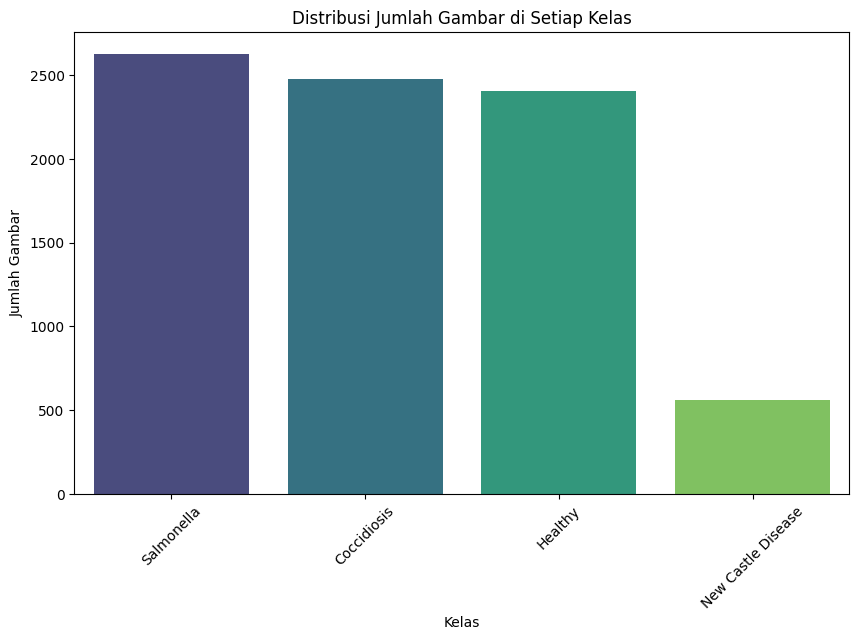

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file CSV
csv_path = '/content/dataset/train_data.csv'
df = pd.read_csv(csv_path)

# Menghitung jumlah gambar di setiap kelas
class_counts = df['label'].value_counts()

# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribusi Jumlah Gambar di Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()


Visualisasi Contoh Gambar dari Setiap Kelas

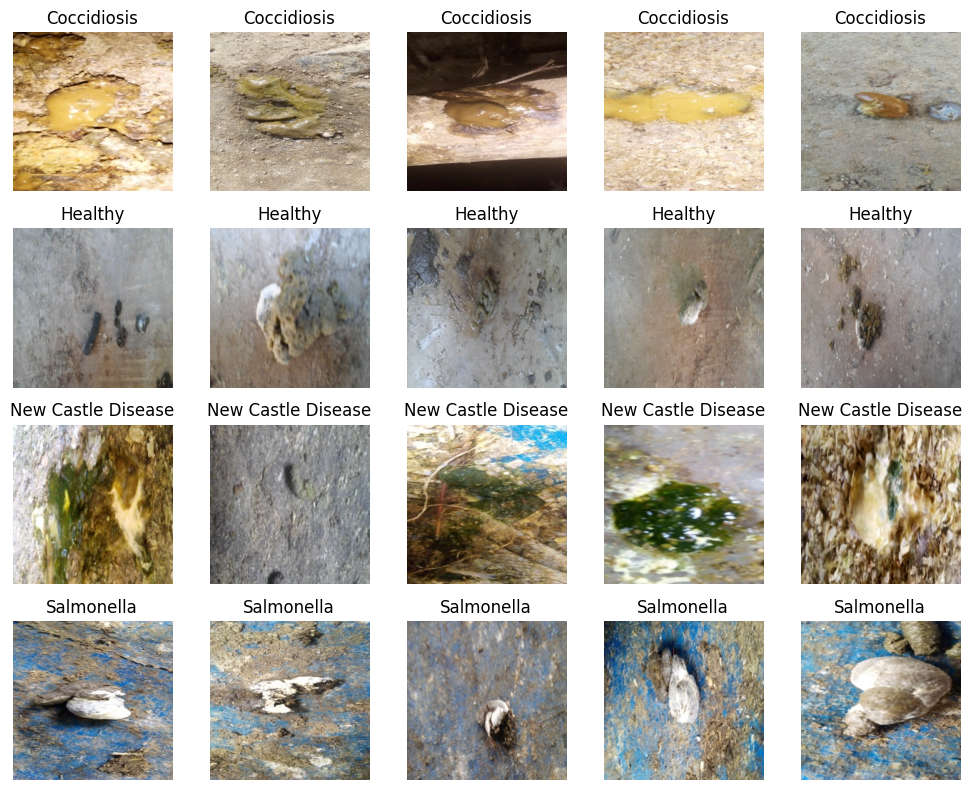

In [35]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Definisikan nama kelas
class_names = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']
train_dir = '/content/dataset_split/train'

plt.figure(figsize=(10, 8))

# Tampilkan 5 gambar dari setiap kelas
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)

    # Pastikan folder kelas ada
    if os.path.isdir(class_path):
        images = os.listdir(class_path)[:5]  # Ambil 5 gambar pertama

        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = mpimg.imread(img_path)
            plt.subplot(len(class_names), 5, i * 5 + j + 1)
            plt.imshow(img)
            plt.axis('off')  # Nonaktifkan sumbu
            plt.title(class_name)

plt.tight_layout()
plt.show()  # Pastikan untuk menampilkan plot
